<a href="https://colab.research.google.com/github/aryan7905/Weather_Predicition/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Data Collection
# Load the dataset
df = pd.read_csv('/content/new_dataset.csv')

# Display the first few rows to understand the data
print("Dataset Overview:")
print(df.head())

# Check for information about the dataset
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
    Outlook  Temp Humidity Windy Play
0     Rainy   Hot     High     f   no
1     Rainy   Hot     High     t   no
2  Overcast   Hot     High     f  yes
3     Sunny  Mild     High     f  yes
4     Sunny  Cool   Normal     f  yes

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Windy     14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes
None

Missing Values:
Outlook     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64


In [ ]:
# 2. Data Preprocessing
# Handle boolean values in 'Windy' column (convert 't'/'f' to 1/0)
df['Windy'] = df['Windy'].map({'t': 1, 'f': 0})

# Encoding categorical variables
le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humidity = LabelEncoder()
le_play = LabelEncoder()

df['Outlook_encoded'] = le_outlook.fit_transform(df['Outlook'])
df['Temp_encoded'] = le_temp.fit_transform(df['Temp'])
df['Humidity_encoded'] = le_humidity.fit_transform(df['Humidity'])
df['Play_encoded'] = le_play.fit_transform(df['Play'])

# Store mapping for future reference
outlook_mapping = dict(zip(le_outlook.classes_, le_outlook.transform(le_outlook.classes_)))
temp_mapping = dict(zip(le_temp.classes_, le_temp.transform(le_temp.classes_)))
humidity_mapping = dict(zip(le_humidity.classes_, le_humidity.transform(le_humidity.classes_)))
play_mapping = dict(zip(le_play.classes_, le_play.transform(le_play.classes_)))

print("\nOutlook Encoding Mapping:")
print(outlook_mapping)
print("\nTemperature Encoding Mapping:")
print(temp_mapping)
print("\nHumidity Encoding Mapping:")
print(humidity_mapping)
print("\nPlay Encoding Mapping:")
print(play_mapping)

# Prepare features and target
X = df[['Outlook_encoded', 'Temp_encoded', 'Humidity_encoded', 'Windy']]
y = df['Play_encoded']


Outlook Encoding Mapping:
{'Overcast': np.int64(0), 'Rainy': np.int64(1), 'Sunny': np.int64(2)}

Temperature Encoding Mapping:
{'Cool': np.int64(0), 'Hot': np.int64(1), 'Mild': np.int64(2)}

Humidity Encoding Mapping:
{'High': np.int64(0), 'Normal': np.int64(1)}

Play Encoding Mapping:
{'no': np.int64(0), 'yes': np.int64(1)}


In [ ]:
# 3. Model Implementation
# Split the dataset into training and testing sets (using a smaller test size due to limited data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# 4. Model Evaluation
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_play.classes_))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Model Accuracy: 0.7500

Classification Report:
              precision    recall  f1-score   support

          no       0.00      0.00      0.00         1
         yes       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4


Confusion Matrix:
[[0 1]
 [0 3]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


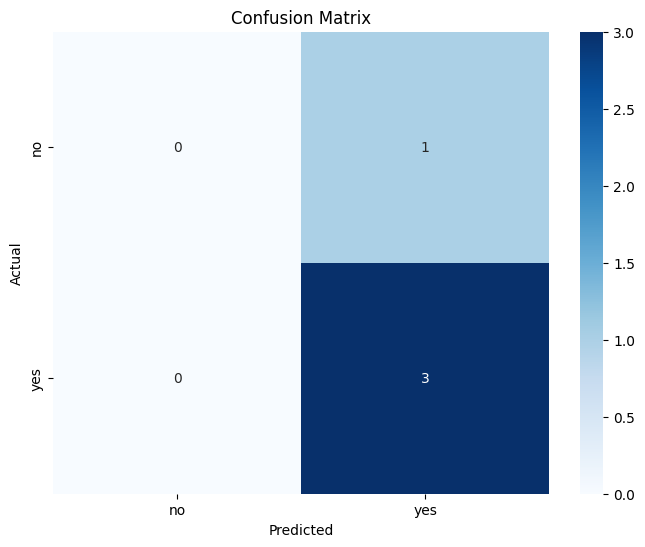

In [ ]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_play.classes_,
            yticklabels=le_play.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 5. Prediction
# Function to predict weather condition given features
def predict_weather(outlook, temp, humidity, windy):
    # Convert string inputs to encoded values
    if outlook in outlook_mapping:
        outlook_encoded = outlook_mapping[outlook]
    else:
        print(f"Invalid outlook value. Valid values are: {list(outlook_mapping.keys())}")
        return None

    if temp in temp_mapping:
        temp_encoded = temp_mapping[temp]
    else:
        print(f"Invalid temperature value. Valid values are: {list(temp_mapping.keys())}")
        return None

    if humidity in humidity_mapping:
        humidity_encoded = humidity_mapping[humidity]
    else:
        print(f"Invalid humidity value. Valid values are: {list(humidity_mapping.keys())}")
        return None

    # Convert windy to int if it's not already
    if isinstance(windy, str):
        windy = 1 if windy.lower() == 't' else 0

    # Make prediction
    features = np.array([[outlook_encoded, temp_encoded, humidity_encoded, windy]])
    prediction = nb_model.predict(features)[0]

    # Convert prediction back to original class
    for key, value in play_mapping.items():
        if value == prediction:
            return key

In [ ]:
# Example predictions
print("\nExample Predictions:")
test_cases = [
    {"outlook": "Sunny", "temp": "Hot", "humidity": "High", "windy": "f"},
    {"outlook": "Overcast", "temp": "Mild", "humidity": "Normal", "windy": "t"},
    {"outlook": "Rainy", "temp": "Cool", "humidity": "Normal", "windy": "f"}
]

for case in test_cases:
    result = predict_weather(case["outlook"], case["temp"], case["humidity"], case["windy"])
    print(f"Weather conditions: {case} -> Prediction: {result}")


Example Predictions:
Weather conditions: {'outlook': 'Sunny', 'temp': 'Hot', 'humidity': 'High', 'windy': 'f'} -> Prediction: no
Weather conditions: {'outlook': 'Overcast', 'temp': 'Mild', 'humidity': 'Normal', 'windy': 't'} -> Prediction: yes
Weather conditions: {'outlook': 'Rainy', 'temp': 'Cool', 'humidity': 'Normal', 'windy': 'f'} -> Prediction: yes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
# Calculate the probability of each class
print("\nClass Probabilities:")
for i, test_case in enumerate(test_cases):
    outlook_encoded = outlook_mapping[test_case["outlook"]]
    temp_encoded = temp_mapping[test_case["temp"]]
    humidity_encoded = humidity_mapping[test_case["humidity"]]
    windy = 1 if test_case["windy"].lower() == 't' else 0

    features = np.array([[outlook_encoded, temp_encoded, humidity_encoded, windy]])
    probs = nb_model.predict_proba(features)[0]

    print(f"Case {i+1}: {test_case}")
    for j, class_name in enumerate(le_play.classes_):
        print(f"  Probability of {class_name}: {probs[j]:.4f}")


Class Probabilities:
Case 1: {'outlook': 'Sunny', 'temp': 'Hot', 'humidity': 'High', 'windy': 'f'}
  Probability of no: 0.5347
  Probability of yes: 0.4653
Case 2: {'outlook': 'Overcast', 'temp': 'Mild', 'humidity': 'Normal', 'windy': 't'}
  Probability of no: 0.0324
  Probability of yes: 0.9676
Case 3: {'outlook': 'Rainy', 'temp': 'Cool', 'humidity': 'Normal', 'windy': 'f'}
  Probability of no: 0.0332
  Probability of yes: 0.9668


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
# Feature importance
print("\nFeature Importance Analysis:")
for i, class_idx in enumerate(range(len(le_play.classes_))):
    print(f"\nClass: {le_play.classes_[i]}")
    class_importance = pd.DataFrame({
        'Feature': X.columns,
        'Mean': nb_model.theta_[class_idx],
        'Variance': nb_model.var_[class_idx]
    })
    print(class_importance)


Feature Importance Analysis:

Class: no
            Feature  Mean  Variance
0   Outlook_encoded  1.50    0.2500
1      Temp_encoded  1.25    0.6875
2  Humidity_encoded  0.25    0.1875
3             Windy  0.75    0.1875

Class: yes
            Feature      Mean  Variance
0   Outlook_encoded  1.000000  0.666667
1      Temp_encoded  0.833333  0.805556
2  Humidity_encoded  0.666667  0.222222
3             Windy  0.333333  0.222222


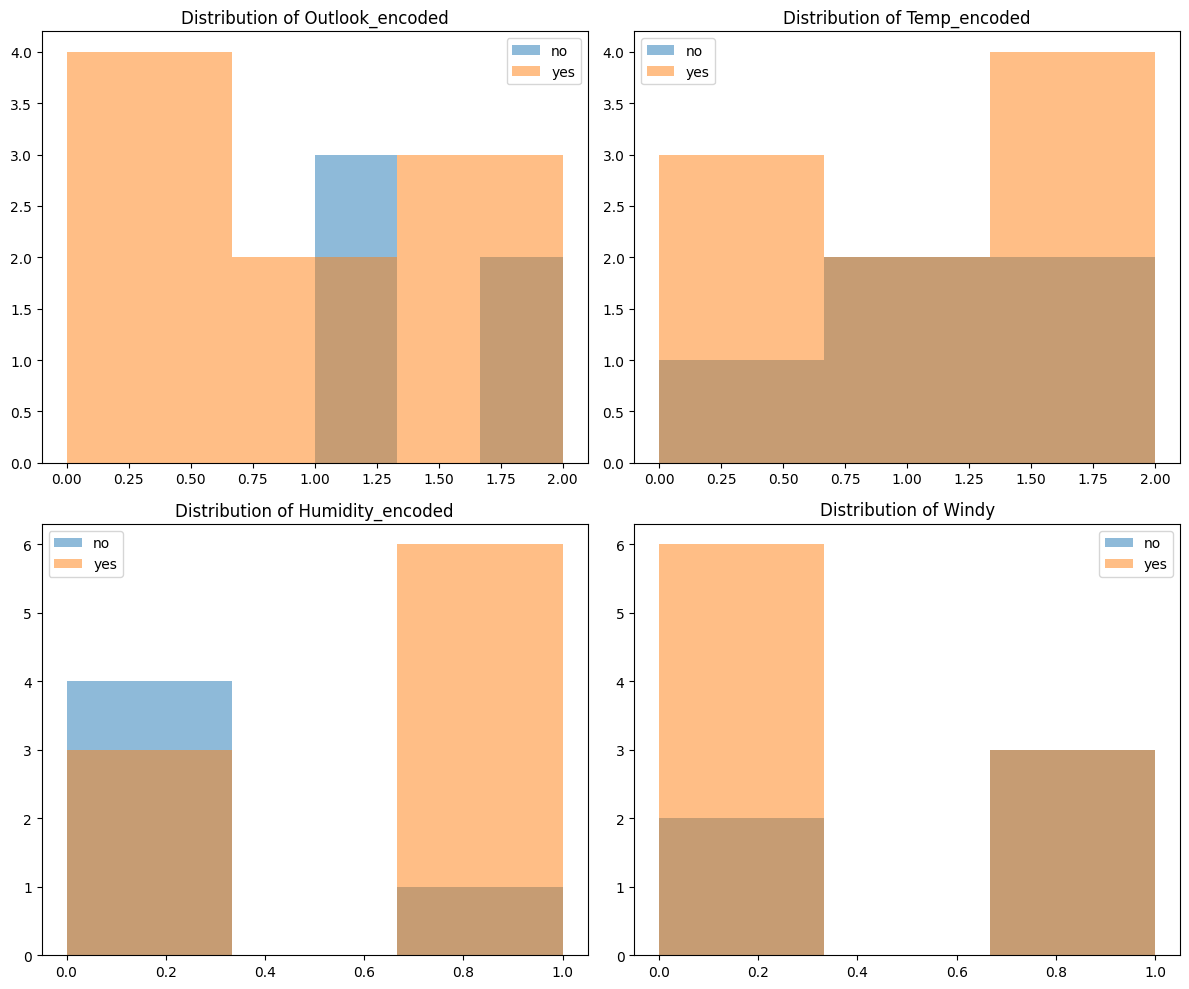

In [ ]:
# Visualize feature distributions by class
plt.figure(figsize=(12, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    for class_val in np.unique(y):
        class_name = le_play.inverse_transform([class_val])[0]
        plt.hist(X[y == class_val][feature], bins=3, alpha=0.5, label=f'{class_name}')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()